In [50]:
import glob
import pandas as pd

%matplotlib inline

In [65]:
def fill_pushers(df, DATA):
    pushers = glob.glob('%s/push_*.txt'%DATA)

    for fname in pushers:
        row=1

        push_ind = int(fname.split('/')[2].strip().split('_')[1])
        #print push_ind
        f = open(fname,'r')
        times = f.readlines()

        start_time = float(times[0])
        #print times[0]
        cnt=1
    
        name = fname.split('/')[2].strip().split('.')[0].strip()
        for val in times[1:]:

            cur_time = float(val)
            cnt+=1

            if (cnt%100000 == 0)and(row<=5):
                #print '%s: Throughput: %s'%(nme, float(cnt/(cur_time-start_time)))
                df.loc[row*100000]['Push_proc_%s'%push_ind] = float(cnt/(cur_time-start_time))
                row+=1
            
    return df

In [122]:
def fill_poppers(df, DATA):
    poppers = glob.glob('%s/pop_*.txt'%DATA)

    for fname in poppers:
        row=1

        pop_ind = int(fname.split('/')[2].strip().split('_')[1])
        #print pop_ind
        f = open(fname,'r')
        times = f.readlines()

        start_time = float(times[0])
        #print times[0]
        cnt=1
    
        name = fname.split('/')[2].strip().split('.')[0].strip()
        for val in times[1:]:

            cur_time = float(val)
            cnt+=1

            if (cnt%100000 == 0)and(row<=5):
                #print '%s: Throughput: %s'%(nme, float(cnt/(cur_time-start_time)))
                df.loc[row*100000]['Pop_proc_%s'%pop_ind] = float(cnt/(cur_time-start_time))
                row+=1
            
    #print df
    return df

In [124]:
def get_throughput_plot(num_push_procs, num_pop_procs, num_queues):

    push_cols = ['Push_proc_%s'%i for i in range(num_push_procs)]
    pop_cols = ['Pop_proc_%s'%i for i in range(num_pop_procs)]
    cols = push_cols + pop_cols

    DATA = './push_%s_pop_%s_q_%s'%(num_push_procs, num_pop_procs, num_queues)

    df = pd.DataFrame(columns=cols, index=[100000,200000,300000,400000,500000])
    
    df = fill_pushers(df, DATA)
    df = fill_poppers(df, DATA)
    
    maxx = 1.25* df.max().max()
    ax = df.plot(kind='line', y=cols, use_index=True, ylim=(0,maxx), 
             title='Throughput with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                                    num_pop_procs,
                                                                                    num_queues)
            )
    ax.set_ylabel('Task per second')
    ax.set_xlabel('Total number of tasks')
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1, 0.5))

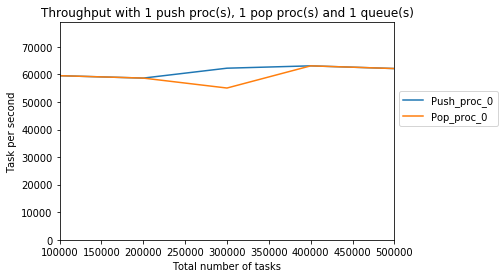

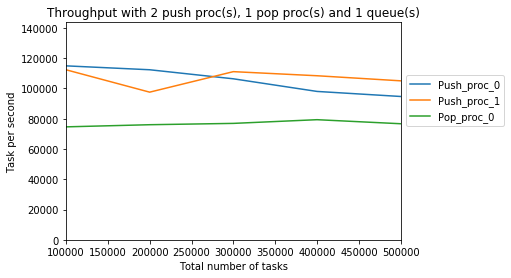

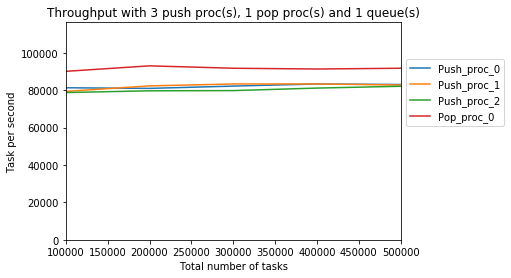

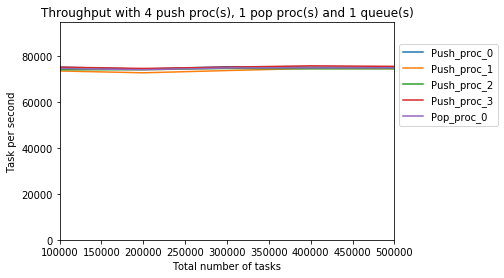

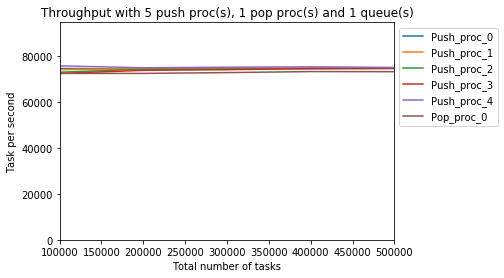

In [126]:
num_push_procs_list = [1,2,3,4,5]
num_pop_procs = 1
num_queues = 1

for num_push_procs in num_push_procs_list:
    get_throughput_plot(num_push_procs, num_pop_procs, num_queues)

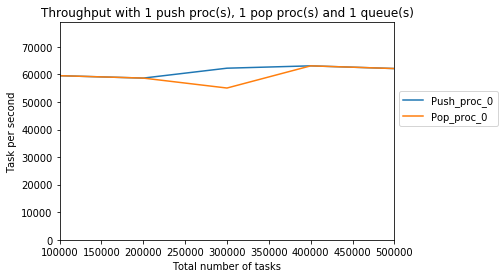

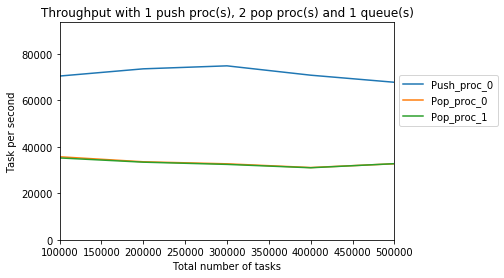

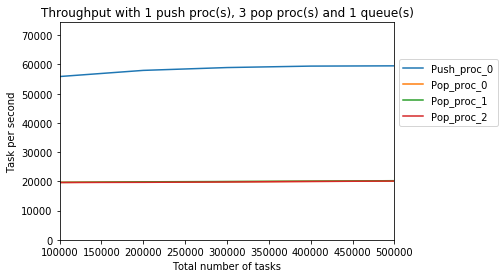

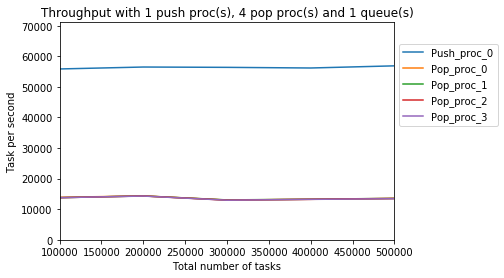

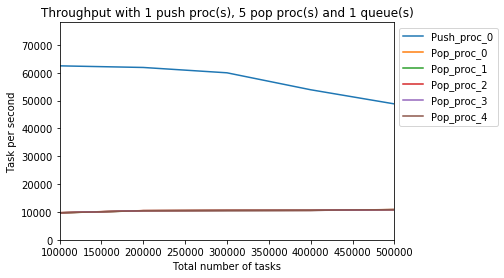

In [125]:
num_push_procs = 1
num_pop_procs_list = [1,2,3,4,5]
num_queues = 1

for num_pop_procs in num_pop_procs_list:
    get_throughput_plot(num_push_procs, num_pop_procs, num_queues)

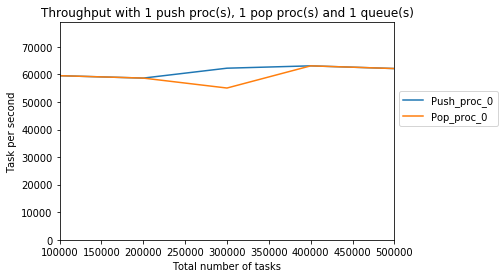

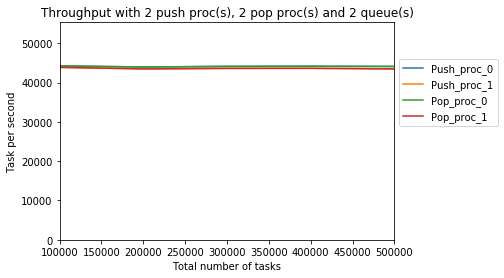

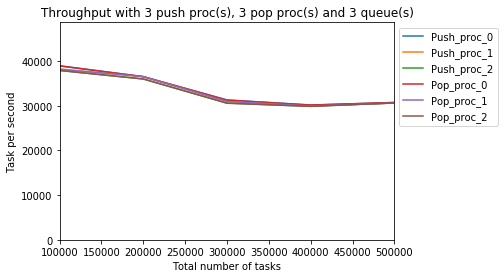

In [128]:
num_queues_list = [1,2,3]

for num_queues in num_queues_list:
    num_push_procs= num_queues
    num_pop_procs= num_queues
    get_throughput_plot(num_push_procs, num_pop_procs, num_queues)